<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.基本概念" data-toc-modified-id="1.基本概念-1">1.基本概念</a></span></li><li><span><a href="#2.各项指标的获取" data-toc-modified-id="2.各项指标的获取-2">2.各项指标的获取</a></span><ul class="toc-item"><li><span><a href="#2.1图的基本描述" data-toc-modified-id="2.1图的基本描述-2.1">2.1图的基本描述</a></span></li><li><span><a href="#2.2异常网络侦测" data-toc-modified-id="2.2异常网络侦测-2.2">2.2异常网络侦测</a></span><ul class="toc-item"><li><span><a href="#GN(Girvan-Newman)法" data-toc-modified-id="GN(Girvan-Newman)法-2.2.1">GN(Girvan-Newman)法</a></span></li><li><span><a href="#Louvain算法" data-toc-modified-id="Louvain算法-2.2.2">Louvain算法</a></span></li><li><span><a href="#LPA(Label-Propagation-Algorithm)" data-toc-modified-id="LPA(Label-Propagation-Algorithm)-2.2.3">LPA(Label Propagation Algorithm)</a></span></li><li><span><a href="#SLPA(GANXiS)" data-toc-modified-id="SLPA(GANXiS)-2.2.4">SLPA(GANXiS)</a></span></li><li><span><a href="#Fast-Unfolding" data-toc-modified-id="Fast-Unfolding-2.2.5">Fast Unfolding</a></span></li></ul></li><li><span><a href="#2.3最短路径" data-toc-modified-id="2.3最短路径-2.3">2.3最短路径</a></span></li><li><span><a href="#2.4-K-Core" data-toc-modified-id="2.4-K-Core-2.4">2.4 K-Core</a></span></li></ul></li><li><span><a href="#2.5社区意见领袖-PageRank" data-toc-modified-id="2.5社区意见领袖-PageRank-3">2.5社区意见领袖 PageRank</a></span></li><li><span><a href="#3基本操作" data-toc-modified-id="3基本操作-4">3基本操作</a></span><ul class="toc-item"><li><span><a href="#3.1添加元素，画图" data-toc-modified-id="3.1添加元素，画图-4.1">3.1添加元素，画图</a></span></li><li><span><a href="#3.2输出数据到gexf" data-toc-modified-id="3.2输出数据到gexf-4.2">3.2输出数据到gexf</a></span></li></ul></li></ul></div>

# 1.基本概念    

Networkx 包包含全部[四种图][ngt]:

- `Graph`: 无向图
- `DiGraph`: 有向图
- `MultiGraph`: 无向图（点之间可以有多个边）
- `MultiDiGraph`: 有向图（点之间可以有多个边）


[ngt]: https://networkx.github.io/documentation/networkx-1.10/reference/classes.html

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# 2.各项指标的获取    
------   

为方便操作，我们首先随机生成以一个图。   

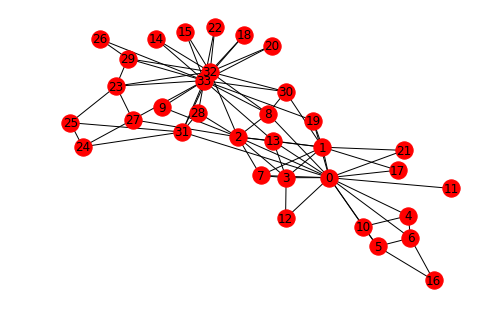

In [2]:
G = nx.karate_club_graph()
#spring_pos = nx.circular_layout(G)
nx.draw(G, with_labels=True)

## 2.1图的基本描述    

图的点、边，点的出度、入度等：

In [3]:
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


或者用nx内的函数分开计算  
+ 离心率：图中某一点到任意点距离的最大值     
$$
e(V) = max_{w \in V(G)}{d(v,w)}
$$

In [4]:
print(nx.eccentricity(G))

{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}


----
+ 半径：所有离心率中的最小值    
$$
radius(G)=\min{e(v)}
$$

In [5]:
nx.radius(G)

3

----
+ 直径：所有离心率中的最大值    
$$
radius(G)=\max{e(v)}
$$

In [6]:
nx.diameter(G)

5

----
+ 中心：所有离心率等于半径的点

In [7]:
nx.center(G)

[0, 1, 2, 3, 8, 13, 19, 31]

----    
+ periphery: 所有离心率等于直径的点

In [8]:
nx.periphery(G)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

----
+ 密度：    
    图的密度对于有向图和无向图的定义如下：   
    + 无向图：    
    $$
    d = \frac{2m}{n(n-1)}
    $$    
    + 有向图：     
    $$
    d = \frac{m}{n(n-1)}
    $$    
    $n$为顶点数，$m$为边数。    

In [9]:
nx.density(G)

0.13903743315508021

## 2.2异常网络侦测     
-----   

###  GN(Girvan-Newman)法      

GN算法的基本思想是不断删除网络中具有相对于所有源节点的最大边介数的边，然后，再重新计算网络中剩余的边的相对于所有源节点的边介数，重复这个过程，直到网络中所有的边都被删除。  


**虽然GN算法的准确率很高，但是计算量大，时间复杂度也很高。不适合应用与过大的图。**


In [10]:
from networkx.algorithms.community import girvan_newman

comp = girvan_newman(G, most_valuable_edge=None)

得到的结果是一个层次树,显示器中3层：

In [11]:
import itertools
list(itertools.islice(comp, 3))

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9})]

可以通过`girvan_newman(G, most_valuable_edge)`中的第二个取值来决定计算时删除边的规则，当没有指定时，默认为介数集中度`networkx.edge_betweenness_centrality()`.下面是用边的权重来剪裁的代码，我们首先给这个图的边添加权重

In [12]:
from operator import itemgetter
edges = G.edges()
nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, 'weight')


def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)


comp = girvan_newman(G, most_valuable_edge=heaviest)

print(list(itertools.islice(comp, 3)))

[({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}, {33}), ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}, {14}, {33}), ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}, {14}, {15}, {33})]


很显然，这两种方法的结果很不一样。  

-----

### Louvain算法      

Louvain可以理解成GN的逆过程，GN的思路是不断拆边，类似于自上而下的层次聚类。   

首先我们需要安装一个包：
```{shell}
pip install python-louvain
```

In [13]:
import community

partition = community.best_partition(G)

type(partition)

dict

`partition`的结果为一个词典，key是顶点，value是所属的社群。以下为可视化。   

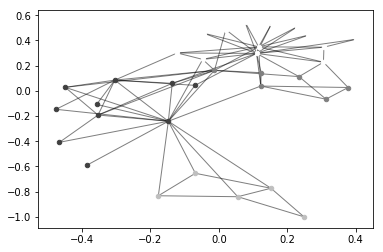

In [14]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [
        nodes for nodes in partition.keys() if partition[nodes] == com
    ]
    nx.draw_networkx_nodes(
        G, pos, list_nodes, node_size=20, node_color=str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### LPA(Label Propagation Algorithm)     

LPA的计算步骤也十分简单：

1. 为所有节点指定一个唯一标签；

2. 刷新标签：对于某一个节点，考察其所有邻居节点的标签，并进行统计，将出现个数最多的那个标签赋给当前节点（如果最多的标签不唯一，随机选择一个）；

3. 重复步骤二，直到收敛为止。

In [15]:
import networkx as nx
from networkx.algorithms.community.label_propagation import asyn_lpa_communities

G = nx.karate_club_graph()
comp = asyn_lpa_communities(G,seed=5)

**需要注意，这里函数输出的`comp`是一个循环器！**    
**`asyn_lpa_communities`的结果很大程度上依赖于起始点的选择，所以`seed`会对结果产生影响！**

In [16]:
par = {}
for ind,i in enumerate(comp):
    par[str(ind)]=list(i)
print(par)

{'0': [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], '1': [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]}


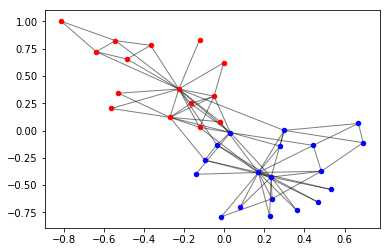

In [17]:
pos = nx.spring_layout(G)
col = ["r","b"]
for ind,com in enumerate(par.keys()):
    list_nodes = par[com]
    nx.draw_networkx_nodes(
        G, pos, list_nodes,node_size=20,node_color=col[ind])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### SLPA(GANXiS)    

这个算法没有现成的python模组，但是有集成的java程序可以使用，详细内容请点[这里][ngt]。



[ngt]:[https://sites.google.com/site/communitydetectionslpa/]

### Fast Unfolding    

该算法可以通过Gephi实现。     

## 2.3最短路径     

In [18]:
short_path = nx.shortest_path(G,source=16,target=20)   
short_path

[16, 5, 0, 2, 32, 20]

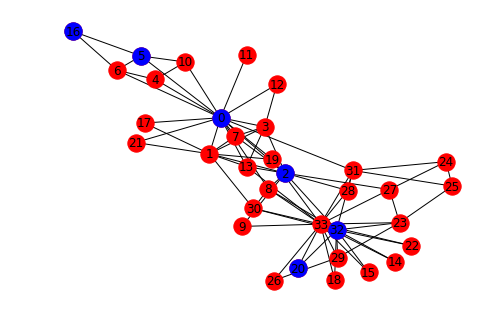

In [19]:
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_nodes(G, pos, short_path,node_color="b")

## 2.4 K-Core     

如果图 $W$ 是图 $G$ 的 $k-core$ ,当且仅当：   

+ $W$ 中的每个节点度数都大于$k$    
+ 且，$W$ 是一个极大子图

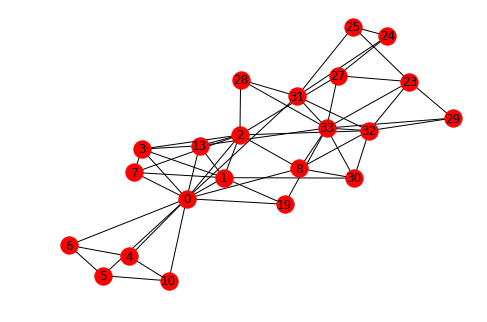

In [20]:
core_5 = nx.k_core(G, k=3)
nx.draw(core_5,with_labels = True)

# 2.5社区意见领袖 PageRank    

`pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)`   



Parameters:	
+ G (graph) – 图
+ alpha (float, optional) – 阻尼系数 default=0.85.
+ personalization (dict, optional) – The “personalization vector” consisting of a dictionary with a key for every graph node and nonzero personalization value for each node. By default, a uniform distribution is used.
+ max_iter (integer, optional) – 最大循环数.
+ tol (float, optional) – 循环结果收敛的容忍程度.
+ nstart (dictionary, optional) – 起始赋值.
+ weight (key, optional) – 用以决定边权重的attr.
+ dangling (dict, optional) – The outedges to be assigned to any “dangling” nodes, i.e., nodes without any outedges. The dict key is the node the outedge points to and the dict value is the weight of that outedge. By default, dangling nodes are given outedges according to the personalization vector (uniform if not specified). This must be selected to result in an irreducible transition matrix (see notes under google_matrix). It may be common to have the dangling dict to be the same as the personalization dict.

In [21]:
pr = nx.pagerank(G, alpha=0.9)
pr

{0: 0.09923208031303203,
 1: 0.0543403155825792,
 2: 0.05919704684187155,
 3: 0.036612460562853694,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.024777139411941047,
 8: 0.030411546757834793,
 9: 0.013746095283556584,
 10: 0.02129205163493875,
 11: 0.008523220243546811,
 12: 0.014015169158033743,
 13: 0.030254309009995452,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 16: 0.015703158296594022,
 17: 0.01395744128254017,
 18: 0.013916466828162465,
 19: 0.019434610880594574,
 20: 0.013916466828162465,
 21: 0.01395744128254017,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 24: 0.02045532726885293,
 25: 0.020410702877569672,
 26: 0.014276670024478019,
 27: 0.025579985022944167,
 28: 0.01938173195115044,
 29: 0.02603805549234405,
 30: 0.024824588072166538,
 31: 0.037572665335286734,
 32: 0.07330616298815512,
 33: 0.10345460652842152}

# 3基本操作

## 3.1添加元素，画图

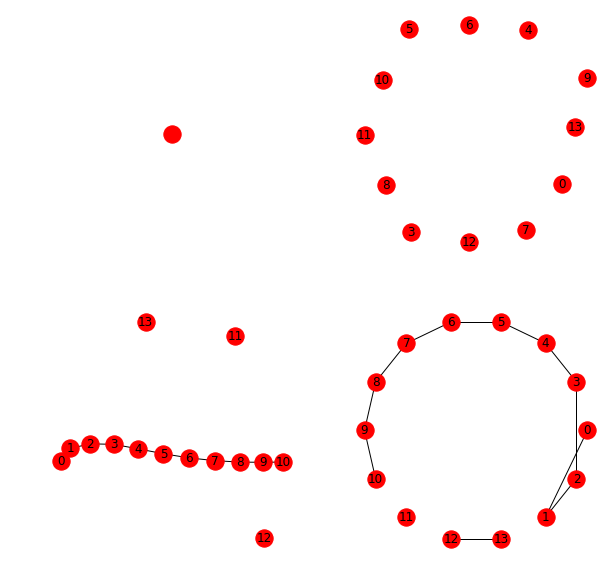

In [22]:
g = nx.Graph()


g.add_node(0)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
nx.draw(g, ax=axs[0,0])

g.add_nodes_from(range(3, 14))

#fig, axs = plt.subplots(figsize=(3, 3))
nx.draw(g, ax=axs[0,1],with_labels=True)

g.add_edges_from([(i, i + 1) for i in range(10)])
nx.draw(g, ax=axs[1,0], with_labels=True)   

g.add_edge(12,13)
nx.draw_circular(g, ax=axs[1,1], with_labels=True)   


## 3.2输出数据到gexf    

输出gexf文件，直接用gephi可视化   

In [23]:
nx.write_gexf(G, "test.gexf")